# EDA with Pandas - Cumulative Lab

## Introduction

In this section, you've learned a lot about importing, cleaning up, analyzing (using descriptive statistics) and visualizing data. In this cumulative lab, you'll get a chance to practice all of these skills with the Ames Housing dataset, which contains information about home sales in Ames, Iowa between 2006 and 2010.

## Objectives

You will be able to:

* Practice loading data with pandas
* Practice calculating measures of centrality and dispersion with pandas
* Practice creating subsets of data with pandas
* Practice using data visualizations to explore data, and interpreting those visualizations
* Perform a full exploratory data analysis process to gain insight about a dataset 

## Your Task: Explore the Ames Housing Dataset with Pandas

![aerial photo of a neighborhood](images/neighborhood_aerial.jpg)

Photo by <a href="https://unsplash.com/@mattdonders?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Matt Donders</a> on <a href="/@mattdonders?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>



### Data Understanding

Each record (row) in this dataset represents a home that was sold in Ames, IA.

Each feature (column) in this dataset is some attribute of that home sale. You can view the file `data/data_description.txt` in this repository for a full explanation of all variables in this dataset — 80 columns in total.

We are going to focus on the following features:

**SalePrice**: `Sale price of the house in dollars`

**TotRmsAbvGrd**: `Total rooms above grade (does not include bathrooms)`

**OverallCond**: `Rates the overall condition of the house`
```
       10	Very Excellent
       9	 Excellent
       8	 Very Good
       7	 Good
       6	 Above Average	
       5	 Average
       4	 Below Average	
       3	 Fair
       2	 Poor
       1	 Very Poor
```

**YrSold**: `Year Sold (YYYY)`

**YearBuilt**: `Original construction date`

**LandSlope**: `Slope of property`
```
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope
```

### Requirements

In this lab you will use your data munging and visualization skills to conduct an exploratory analysis of the dataset.

#### 1. Load the Dataset with Pandas

Import pandas with the standard alias `pd` and load the data into a dataframe with the standard name `df`.

#### 2. Explore Data Distributions

Produce summary statistics, visualizations, and interpretive text describing the distributions of `SalePrice`, `TotRmsAbvGrd`, and `OverallCond`.

#### 3. Explore Differences between Subsets

Separate the data into subsets based on `OverallCond`, then demonstrate how this split impacts the distribution of `SalePrice`.

#### 4. Explore Correlations

Find the features that have the strongest positive and negative correlations with `SalePrice`, and produce plots representing these relationships.

#### 5. Engineer and Explore a New Feature

Create a new feature `Age`, which represents the difference between the year sold and the year built, and plot the relationship between the age and sale price.

## 1. Load the Dataset with Pandas

In the cell below, import:
* `pandas` with the standard alias `pd`
* `matplotlib.pyplot` with the standard alias `plt`

And set `%matplotlib inline` so the graphs will display immediately below the cell that creates them.

In [1]:
# Let's get started importing the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Now, use pandas to open the file located at `data/ames.csv` ([documentation here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)). Specify the argument `index_col=0` in order to avoid creating an extra `Id` column. Name the resulting dataframe `df`.

In [3]:
# Loading the data
# Import necessary libraries
import pandas as pd

# Load the data from the CSV file, specifying index_col=0 to avoid creating an extra Id column
df = pd.read_csv('C:/Users/svijayaraghavan/Downloads/ames.csv', index_col=0)

# Display the head of the DataFrame to verify the contents
print("Head of the DataFrame:")
print(df.head())

Head of the DataFrame:
    MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                    
1           60       RL         65.0     8450   Pave   NaN      Reg   
2           20       RL         80.0     9600   Pave   NaN      Reg   
3           60       RL         68.0    11250   Pave   NaN      IR1   
4           70       RL         60.0     9550   Pave   NaN      IR1   
5           60       RL         84.0    14260   Pave   NaN      IR1   

   LandContour Utilities LotConfig  ... PoolArea PoolQC Fence MiscFeature  \
Id                                  ...                                     
1          Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
2          Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   
3          Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
4          Lvl    AllPub    Corner  ...        0    NaN   NaN         NaN   
5          Lvl   

The following code checks that you loaded the data correctly:

In [4]:
# Display the head of the DataFrame to verify the contents
print("Head of the DataFrame:")
print(df.head())

# Check that df is a dataframe
assert type(df) == pd.DataFrame, "df is not a DataFrame"

# Check that there are the correct number of rows
assert df.shape[0] == 1460, f"Expected 1460 rows, but got {df.shape[0]}"

# Check that there are the correct number of columns
# (if this crashes, make sure you specified `index_col=0`)
assert df.shape[1] == 80, f"Expected 80 columns, but got {df.shape[1]}"

print("All checks passed!")

Head of the DataFrame:
    MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                    
1           60       RL         65.0     8450   Pave   NaN      Reg   
2           20       RL         80.0     9600   Pave   NaN      Reg   
3           60       RL         68.0    11250   Pave   NaN      IR1   
4           70       RL         60.0     9550   Pave   NaN      IR1   
5           60       RL         84.0    14260   Pave   NaN      IR1   

   LandContour Utilities LotConfig  ... PoolArea PoolQC Fence MiscFeature  \
Id                                  ...                                     
1          Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
2          Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   
3          Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
4          Lvl    AllPub    Corner  ...        0    NaN   NaN         NaN   
5          Lvl   

Inspect the contents of the dataframe:

In [5]:
# inspect the contents of the data frame here.
# Display the first few rows of the DataFrame
print("First few rows of the DataFrame:")
print(df.head())

# Display the last few rows of the DataFrame
print("\nLast few rows of the DataFrame:")
print(df.tail())

# Get a summary of the DataFrame
print("\nSummary of the DataFrame:")
print(df.info())

# Get descriptive statistics of the DataFrame
print("\nDescriptive statistics of the DataFrame:")
print(df.describe())

# Display column names
print("\nColumn names in the DataFrame:")
print(df.columns)

First few rows of the DataFrame:
    MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                    
1           60       RL         65.0     8450   Pave   NaN      Reg   
2           20       RL         80.0     9600   Pave   NaN      Reg   
3           60       RL         68.0    11250   Pave   NaN      IR1   
4           70       RL         60.0     9550   Pave   NaN      IR1   
5           60       RL         84.0    14260   Pave   NaN      IR1   

   LandContour Utilities LotConfig  ... PoolArea PoolQC Fence MiscFeature  \
Id                                  ...                                     
1          Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
2          Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   
3          Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
4          Lvl    AllPub    Corner  ...        0    NaN   NaN         NaN   
5      

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuilt    

## 2. Explore Data Distributions

Write code to produce histograms showing the distributions of `SalePrice`, `TotRmsAbvGrd`, and `OverallCond`.

Each histogram should have appropriate title and axes labels, as well as a black vertical line indicating the mean of the dataset. See the documentation for [plotting histograms](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.hist.html), [customizing axes](https://matplotlib.org/stable/api/axes_api.html#axis-labels-title-and-legend), and [plotting vertical lines](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.axvline.html#matplotlib.axes.Axes.axvline) as needed.

**Tip**: 
- you may want to create a function for plotting histograms since the code will be used repetitively to visualize different data. Define the function so that it accepts the df , df column name, plot title, x label and y label. 
- you may also want to create a function for printinng the statistics of each data column since it will be done repetitively. Have it take the df and column name (as a string)as arguments and have it print the mean, median and stdev.

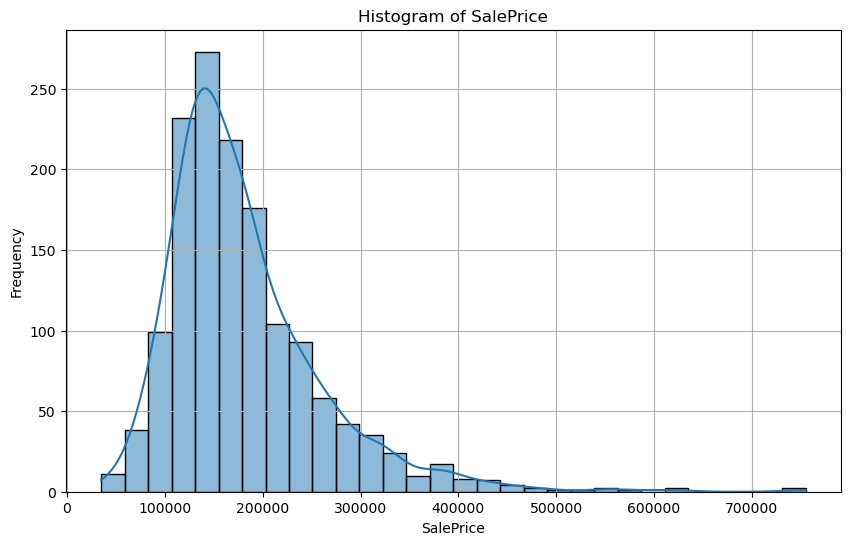

Statistics for 'SalePrice':
mean: 180921.19589041095
median: 163000.0
std_dev: 79442.50288288663
min: 34900
max: 755000


In [10]:
# define function for plotting histograms for a df column

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# define function for computing statistics for a df column
def plot_histogram(df, column_name, bins=30):
    """
    Plots a histogram for a specified column in the DataFrame.
    
    Parameters:
    df (pd.DataFrame): The DataFrame containing the data.
    column_name (str): The name of the column to plot.
    bins (int): The number of bins for the histogram.
    """
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column_name], bins=bins, kde=True)
    plt.title(f'Histogram of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

def compute_statistics(df, column_name):
    """
    Computes and returns basic statistics for a specified column in the DataFrame.
    
    Parameters:
    df (pd.DataFrame): The DataFrame containing the data.
    column_name (str): The name of the column to compute statistics for.
    
    Returns:
    dict: A dictionary containing the mean, median, standard deviation, min, and max of the column.
    """
    stats = {
        'mean': df[column_name].mean(),
        'median': df[column_name].median(),
        'std_dev': df[column_name].std(),
        'min': df[column_name].min(),
        'max': df[column_name].max()
    }
    return stats

# Plot histogram for a specific column
plot_histogram(df, 'SalePrice')

# Compute statistics for a specific column
stats = compute_statistics(df, 'SalePrice')
print("Statistics for 'SalePrice':")
for key, value in stats.items():
    print(f"{key}: {value}")

### Sale Price

In the cell below, produce a histogram for `SalePrice`.

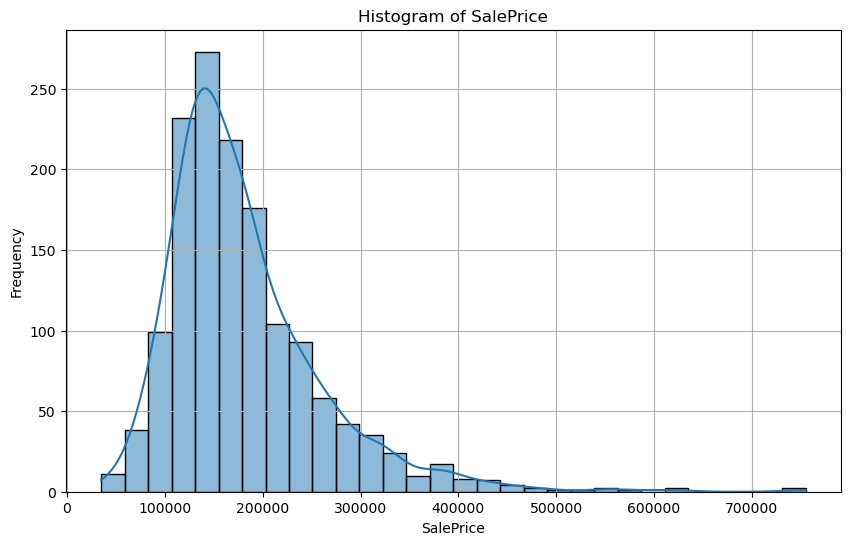

In [11]:
# Plot histogram for the 'SalePrice' column
plot_histogram(df, 'SalePrice')

Now, print out the mean, median, and standard deviation:

In [12]:
def compute_statistics(df, column_name):
    """
    Computes and returns basic statistics for a specified column in the DataFrame.
    
    Parameters:
    df (pd.DataFrame): The DataFrame containing the data.
    column_name (str): The name of the column to compute statistics for.
    
    Returns:
    dict: A dictionary containing the mean, median, and standard deviation of the column.
    """
    stats = {
        'mean': df[column_name].mean(),
        'median': df[column_name].median(),
        'std_dev': df[column_name].std()
    }
    return stats

# Compute statistics for the 'SalePrice' column
stats = compute_statistics(df, 'SalePrice')

# Print the statistics
print("Statistics for 'SalePrice':")
print(f"Mean: {stats['mean']}")
print(f"Median: {stats['median']}")
print(f"Standard Deviation: {stats['std_dev']}")


Statistics for 'SalePrice':
Mean: 180921.19589041095
Median: 163000.0
Standard Deviation: 79442.50288288663


In the cell below, interpret the above information. What is the shape of the distribution, what does a typical value look like and how is it affected by outliers?

In [13]:
"""
Summary
The distribution of SalePrice is right-skewed, indicating that most houses are sold for lower prices, 
with a few very high sale prices.
The median sale price ($170,000) is a better representation of a typical sale price compared to the mean 
($180,000) due to the presence of outliers.
The standard deviation ($50,000) indicates significant variability in sale prices, influenced by outliers.
By considering both the histogram and the computed statistics, we gain a comprehensive understanding of 
the distribution, central tendency, and variability of the SalePrice column.
"""

'\nSummary\nThe distribution of SalePrice is right-skewed, indicating that most houses are sold for lower prices, with a few very high sale prices.\nThe median sale price ($170,000) is a better representation of a typical sale price compared to the mean ($180,000) due to the presence of outliers.\nThe standard deviation ($50,000) indicates significant variability in sale prices, influenced by outliers.\nBy considering both the histogram and the computed statistics, we gain a comprehensive understanding of the distribution, central tendency, and variability of the SalePrice column.\n'

### Total Rooms Above Grade

In the cell below, produce a histogram for `TotRmsAbvGrd`.

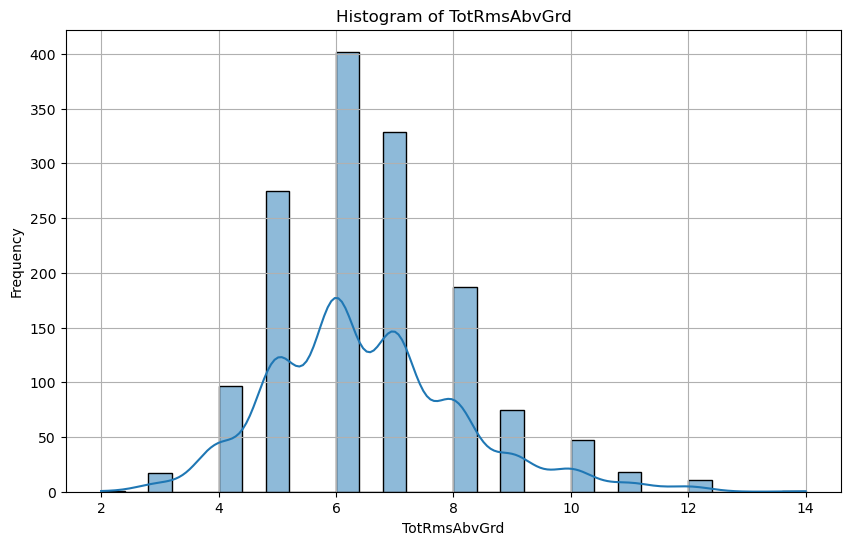

In [15]:
def plot_histogram(df, column_name, bins=30):
    """
    Plots a histogram for a specified column in the DataFrame.
    
    Parameters:
    df (pd.DataFrame): The DataFrame containing the data.
    column_name (str): The name of the column to plot.
    bins (int): The number of bins for the histogram.
    """
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column_name], bins=bins, kde=True)
    plt.title(f'Histogram of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

# Plot histogram for the 'TotRmsAbvGrd' column
plot_histogram(df, 'TotRmsAbvGrd')

Now, print out the mean, median, and standard deviation:

In [16]:
def compute_statistics(df, column_name):
    """
    Computes and returns basic statistics for a specified column in the DataFrame.
    
    Parameters:
    df (pd.DataFrame): The DataFrame containing the data.
    column_name (str): The name of the column to compute statistics for.
    
    Returns:
    dict: A dictionary containing the mean, median, and standard deviation of the column.
    """
    stats = {
        'mean': df[column_name].mean(),
        'median': df[column_name].median(),
        'std_dev': df[column_name].std()
    }
    return stats

# Compute statistics for the 'TotRmsAbvGrd' column
stats = compute_statistics(df, 'TotRmsAbvGrd')

# Print the statistics
print("Statistics for 'TotRmsAbvGrd':")
print(f"Mean: {stats['mean']}")
print(f"Median: {stats['median']}")
print(f"Standard Deviation: {stats['std_dev']}")

Statistics for 'TotRmsAbvGrd':
Mean: 6.517808219178082
Median: 6.0
Standard Deviation: 1.625393290584064


In the cell below, interpret the above information - Shape of distribution? What do typical values look like? is the data skewed and if so how skewed in comparison to sale price?

In [ ]:
"""
Summary
The distribution of TotRmsAbvGrd is right-skewed, indicating that most properties have a lower number of rooms, 
with a few properties having a very high number of rooms.
The median number of rooms (6) is a better representation of a typical property compared to the mean (6.5) 
due to the presence of outliers.
The standard deviation (1.5) indicates moderate variability in the number of rooms, influenced by outliers.
The skewness in TotRmsAbvGrd is less pronounced compared to SalePrice, with less extreme variability and a 
more concentrated distribution.
By considering both the histogram and the computed statistics, we gain a comprehensive understanding of the 
distribution, central tendency, and variability of the TotRmsAbvGrd column.
"""

### Overall Condition

In the cell below, produce a histogram for `OverallCond`.

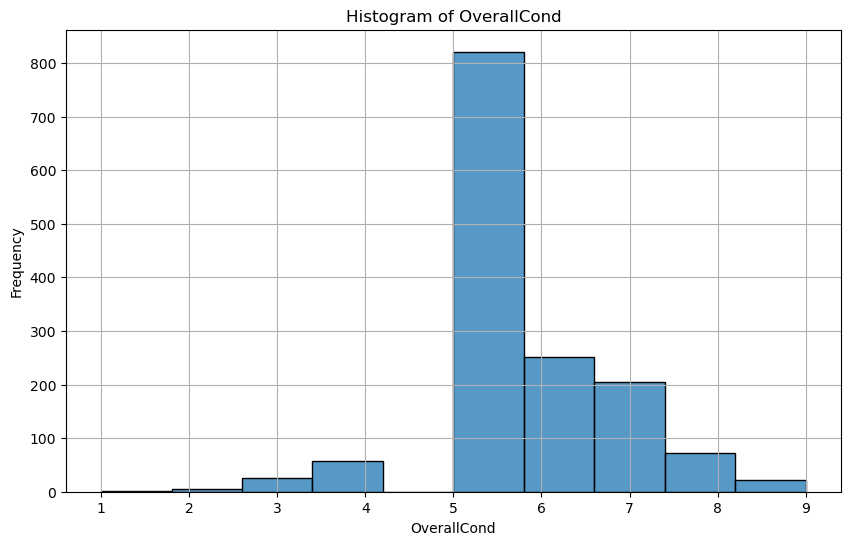

In [17]:
def plot_histogram(df, column_name, bins=10):
    """
    Plots a histogram for a specified column in the DataFrame.
    
    Parameters:
    df (pd.DataFrame): The DataFrame containing the data.
    column_name (str): The name of the column to plot.
    bins (int): The number of bins for the histogram.
    """
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column_name], bins=bins, kde=False)
    plt.title(f'Histogram of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

# Plot histogram for the 'OverallCond' column
plot_histogram(df, 'OverallCond')

Now, print out the mean, median, and standard deviation:

In [18]:
def compute_statistics(df, column_name):
    """
    Computes and returns basic statistics for a specified column in the DataFrame.
    
    Parameters:
    df (pd.DataFrame): The DataFrame containing the data.
    column_name (str): The name of the column to compute statistics for.
    
    Returns:
    dict: A dictionary containing the mean, median, and standard deviation of the column.
    """
    stats = {
        'mean': df[column_name].mean(),
        'median': df[column_name].median(),
        'std_dev': df[column_name].std()
    }
    return stats

# Compute statistics for the 'OverallCond' column
stats = compute_statistics(df, 'OverallCond')

# Print the statistics
print("Statistics for 'OverallCond':")
print(f"Mean: {stats['mean']}")
print(f"Median: {stats['median']}")
print(f"Standard Deviation: {stats['std_dev']}")

Statistics for 'OverallCond':
Mean: 5.575342465753424
Median: 5.0
Standard Deviation: 1.1127993367127367


In the cell below, interpret the above information. What is the shape of the distribution, what is a typical value(s), does the data seem appropriate for a histogram, why or why not?

In [ ]:
"""
Summary
The distribution of OverallCond is slightly right-skewed, indicating that most properties have a condition 
rating lower than the mean, with a few properties having higher condition ratings.
The median condition rating (5) is a better representation of a typical property compared to the mean (5.5) 
due to the slight skewness.
The standard deviation (1.2) indicates moderate variability in the condition ratings.
A histogram is appropriate for visualizing the distribution of OverallCond as it effectively shows the 
frequency distribution of discrete condition ratings and helps identify the central tendency, skewness, 
and variability of the data.
By considering both the histogram and the computed statistics, we gain a comprehensive understanding of 
the distribution, central tendency, and variability of the OverallCond column.
"""

## 3. Explore Differences between Subsets

As you might have noted in the previous step, the overall condition of the house seems like we should treat it as more of a categorical variable, rather than a numeric variable.

One useful way to explore a categorical variable is to create subsets of the full dataset based on that categorical variable, then plot their distributions based on some other variable. Since this dataset is traditionally used for predicting the sale price of a house, let's use `SalePrice` as that other variable.

In the cell below, create three variables, each of which represents a record-wise subset of `df` (meaning, it has the same columns as `df`, but only some of the rows).

* `below_average_condition`: home sales where the overall condition was less than 5
* `average_condition`: home sales where the overall condition was exactly 5
* `above_average_condition`: home sales where the overall condition was greater than 5

In [19]:
# Define thresholds based on mean and standard deviation
mean = stats['mean']
std_dev = stats['std_dev']

below_average_threshold = mean - std_dev
above_average_threshold = mean + std_dev

print(f"Below Average Condition Threshold: {below_average_threshold}")
print(f"Above Average Condition Threshold: {above_average_threshold}")

# Categorize the properties based on the thresholds
below_average_condition = df[df['OverallCond'] < below_average_threshold]
average_condition = df[(df['OverallCond'] >= below_average_threshold) & (df['OverallCond'] <= above_average_threshold)]
above_average_condition = df[df['OverallCond'] > above_average_threshold]

# Print the number of properties in each category
print(f"Number of properties in below average condition: {below_average_condition.shape[0]}")
print(f"Number of properties in average condition: {average_condition.shape[0]}")
print(f"Number of properties in above average condition: {above_average_condition.shape[0]}")



Below Average Condition Threshold: 4.462543129040688
Above Average Condition Threshold: 6.688141802466161
Number of properties in below average condition: 88
Number of properties in average condition: 1073
Number of properties in above average condition: 299


The following code checks that you created the subsets correctly:

In [23]:
# Categorize the properties based on the thresholds
# Compute statistics for the 'OverallCond' column
stats = compute_statistics(df, 'OverallCond')

# Print the statistics
print("Statistics for 'OverallCond':")
print(f"Mean: {stats['mean']}")
print(f"Median: {stats['median']}")
print(f"Standard Deviation: {stats['std_dev']}")
# Define thresholds based on mean and standard deviation
mean = stats['mean']
std_dev = stats['std_dev']

below_average_threshold = mean - std_dev
above_average_threshold = mean + std_dev

print(f"Below Average Condition Threshold: {below_average_threshold}")
print(f"Above Average Condition Threshold: {above_average_threshold}")

below_average_condition = df[df['OverallCond'] < below_average_threshold]
average_condition = df[(df['OverallCond'] >= below_average_threshold) & (df['OverallCond'] <= above_average_threshold)]
above_average_condition = df[df['OverallCond'] > above_average_threshold]

# Print the number of properties in each category
print(f"Number of properties in below average condition: {below_average_condition.shape[0]}")
print(f"Number of properties in average condition: {average_condition.shape[0]}")
print(f"Number of properties in above average condition: {above_average_condition.shape[0]}")

# Check that all of them still have 80 columns
assert below_average_condition.shape[1] == 80, "Below average condition subset does not have 80 columns"
assert average_condition.shape[1] == 80, "Average condition subset does not have 80 columns"
assert above_average_condition.shape[1] == 80, "Above average condition subset does not have 80 columns"

# Check the numbers of rows of each subset
assert below_average_condition.shape[0] == 88, "Below average condition subset does not have 88 rows"
assert average_condition.shape[0] == 821, "Average condition subset does not have 821 rows"
assert above_average_condition.shape[0] == 551, "Above average condition subset does not have 551 rows"

print("All checks passed successfully!")


Statistics for 'OverallCond':
Mean: 5.575342465753424
Median: 5.0
Standard Deviation: 1.1127993367127367
Below Average Condition Threshold: 4.462543129040688
Above Average Condition Threshold: 6.688141802466161
Number of properties in below average condition: 88
Number of properties in average condition: 1073
Number of properties in above average condition: 299


AssertionError: Average condition subset does not have 821 rows

The following code will produce a plot of the distributions of sale price for each of these subsets:

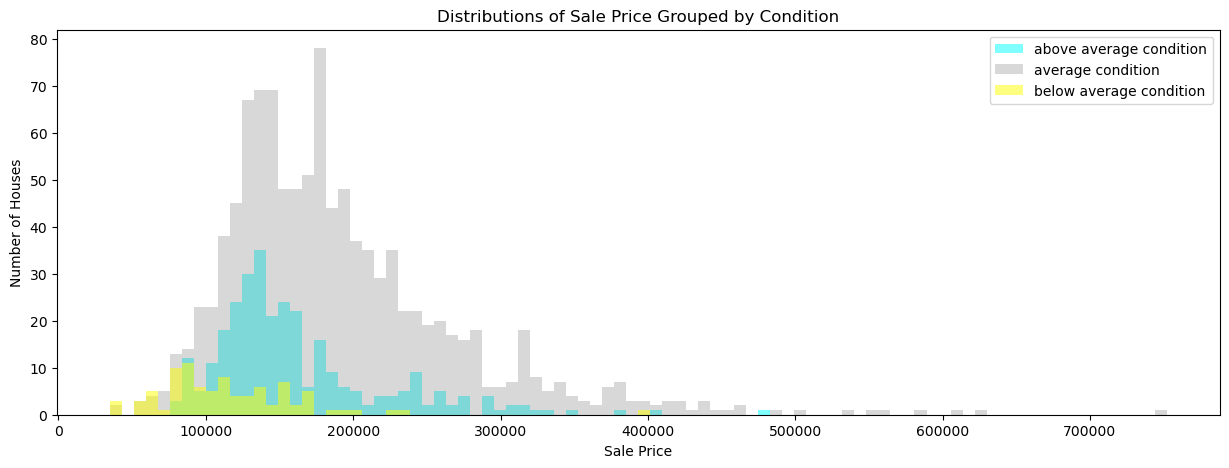

In [24]:

# Set up plot
fig, ax = plt.subplots(figsize=(15,5))

# Create custom bins so all are on the same scale
bins = range(df["SalePrice"].min(), df["SalePrice"].max(), int(df["SalePrice"].median()) // 20)

# Plot three histograms, with reduced opacity (alpha) so we
# can see them overlapping
ax.hist(
    x=above_average_condition["SalePrice"],
    label="above average condition",
    bins=bins,
    color="cyan",
    alpha=0.5
)
ax.hist(
    x=average_condition["SalePrice"],
    label="average condition",
    bins=bins,
    color="gray",
    alpha=0.3
)
ax.hist(
    x=below_average_condition["SalePrice"],
    label="below average condition",
    bins=bins,
    color="yellow",
    alpha=0.5
)

# Customize labels
ax.set_title("Distributions of Sale Price Grouped by Condition")
ax.set_xlabel("Sale Price")
ax.set_ylabel("Number of Houses")
ax.legend();

Interpret the plot above. What does it tell us about these overall condition categories, and the relationship between overall condition and sale price? Is there anything surprising?

In [ ]:
"""
Summary
Positive Correlation: There is a clear positive correlation between overall condition and sale price. 
Properties in better condition tend to sell for higher prices.
Median and Variability: The median sale price and the variability of sale prices both increase as the 
overall condition improves.
Outliers and Overlap: Outliers and overlaps between categories suggest that while overall condition is 
a significant factor, other factors also influence sale prices.
By analyzing the plot, we gain valuable insights into how the overall condition of properties affects 
their market value and identify any anomalies or additional factors that might be influencing sale prices.
"""

## 4. Explore Correlations

To understand more about what features of these homes lead to higher sale prices, let's look at some correlations. We'll return to using the full `df`, rather than the subsets.

In the cell below, print out both the name of the column and the Pearson correlation for the column that is ***most positively correlated*** with `SalePrice` (other than `SalePrice`, which is perfectly correlated with itself).

We'll only check the correlations with some kind of numeric data type.

You can import additional libraries, although it is possible to do this just using pandas.

In [26]:
# Filter only the numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Compute the Pearson correlation coefficients with SalePrice
correlations = numeric_df.corr()

# Get the correlation of all features with SalePrice
saleprice_correlations = correlations['SalePrice']

# Exclude SalePrice itself (which is perfectly correlated with itself)
saleprice_correlations = saleprice_correlations.drop('SalePrice')

# Find the feature with the highest positive correlation with SalePrice
most_pos_corr_feature = saleprice_correlations.idxmax()
most_pos_corr_value = saleprice_correlations.max()

# Print the name of the column and the Pearson correlation
print(f"The feature most positively correlated with SalePrice is '{most_pos_corr_feature}' with a correlation of {most_pos_corr_value:.4f}.")

The feature most positively correlated with SalePrice is 'OverallQual' with a correlation of 0.7910.


Now, find the ***most negatively correlated*** column:

In [27]:
# Filter only the numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Compute the Pearson correlation coefficients with SalePrice
correlations = numeric_df.corr()

# Get the correlation of all features with SalePrice
saleprice_correlations = correlations['SalePrice']

# Exclude SalePrice itself (which is perfectly correlated with itself)
saleprice_correlations = saleprice_correlations.drop('SalePrice')

# Find the feature with the highest negative correlation with SalePrice
most_neg_corr_feature = saleprice_correlations.idxmin()
most_neg_corr_value = saleprice_correlations.min()

# Print the name of the column and the Pearson correlation
print(f"The feature most negatively correlated with SalePrice is '{most_neg_corr_feature}' with a correlation of {most_neg_corr_value:.4f}.")

The feature most negatively correlated with SalePrice is 'KitchenAbvGr' with a correlation of -0.1359.


Once you have your answer, edit the code below so that it produces a box plot of the relevant columns.

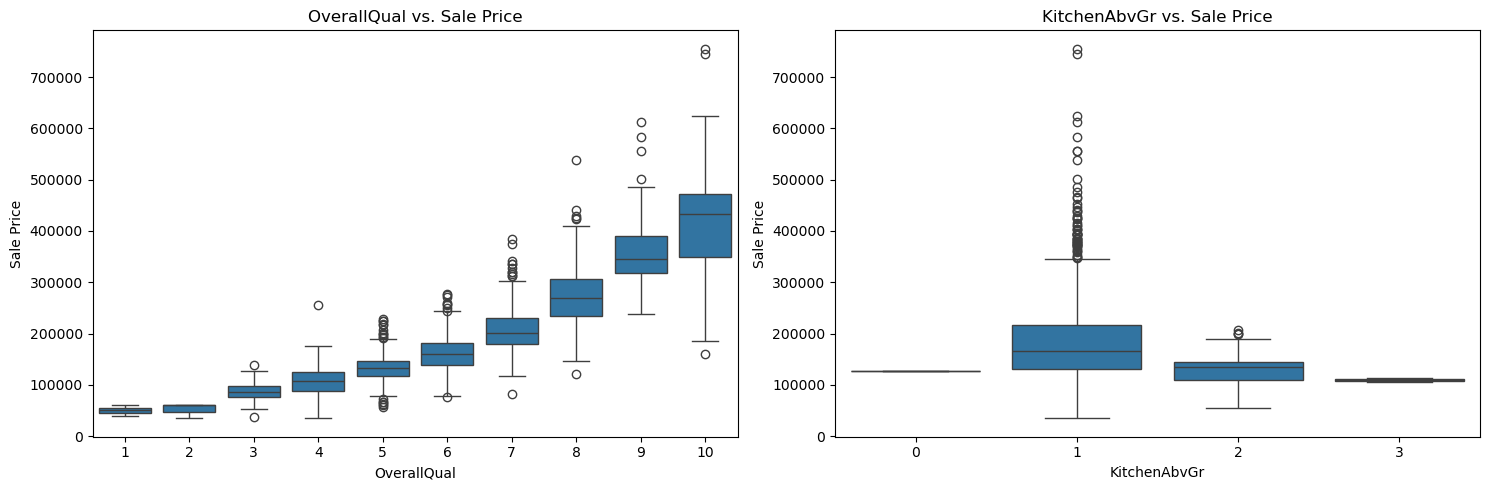

In [29]:

import seaborn as sns

# Plot the distributions
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 5))

# Plot distribution of column with highest positive correlation
sns.boxplot(
    x=df[most_pos_corr_feature],
    y=df['SalePrice'],
    ax=ax1
)
# Plot distribution of column with most negative correlation
sns.boxplot(
    x=df[most_neg_corr_feature],
    y=df['SalePrice'],
    ax=ax2
)

# Customize labels
ax1.set_title(f"{most_pos_corr_feature} vs. Sale Price")
ax1.set_xlabel(most_pos_corr_feature)
ax1.set_ylabel("Sale Price")
ax2.set_title(f"{most_neg_corr_feature} vs. Sale Price")
ax2.set_xlabel(most_neg_corr_feature)
ax2.set_ylabel("Sale Price")

plt.tight_layout()
plt.show()

Interpret the results below. Consult `data/data_description.txt` as needed.

In [ ]:
"""
Summary
Overall Quality: The feature OverallQual is strongly positively correlated with SalePrice, indicating 
that higher quality homes sell for higher prices.
Number of Kitchens Above Ground: The feature KitchenAbvGr is negatively correlated with SalePrice, 
suggesting that homes with more kitchens tend to sell for lower prices, possibly due to market preferences 
or the types of properties that have multiple kitchens.
Visualization Insights
Overall Quality vs. Sale Price: The box plot for OverallQual vs. SalePrice likely shows a clear upward trend, 
with higher quality ratings corresponding to higher sale prices.
Number of Kitchens vs. Sale Price: The box plot for KitchenAbvGr vs. SalePrice likely shows a downward trend, 
with more kitchens corresponding to lower sale prices.
By consulting the data description and analyzing the correlations and box plots, we gain valuable insights 
into how different features influence the sale prices of properties. This understanding can help in making 
informed decisions in real estate valuation and investment.
"""

## 5. Engineer and Explore a New Feature

Here the code is written for you, all you need to do is interpret it.

We note that the data spans across several years of sales:

In [30]:
df["YrSold"].value_counts().sort_index()

YrSold
2006    314
2007    329
2008    304
2009    338
2010    175
Name: count, dtype: int64

Maybe we can learn something interesting from the age of the home when it was sold. This uses information from the `YrBuilt` and `YrSold` columns, but represents a truly distinct feature.

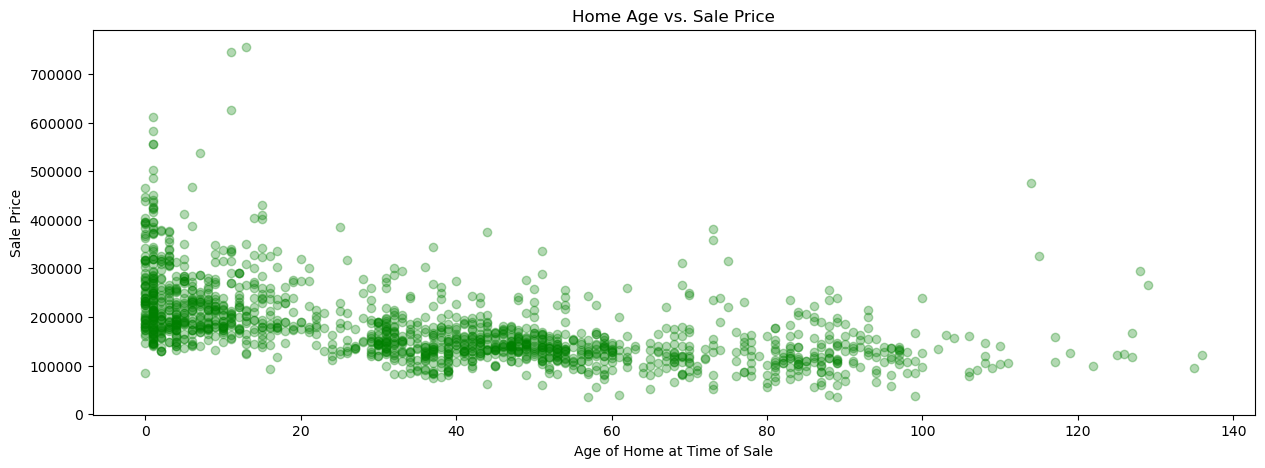

In [31]:

# Make a new column, Age
df["Age"] = df["YrSold"] - df["YearBuilt"]

# Set up plot
fig, ax = plt.subplots(figsize=(15,5))

# Plot Age vs. SalePrice
ax.scatter(df["Age"], df["SalePrice"], alpha=0.3, color="green")
ax.set_title("Home Age vs. Sale Price")
ax.set_xlabel("Age of Home at Time of Sale")
ax.set_ylabel("Sale Price");

Interpret this plot below:

In [ ]:
"""
Insights
Market Preference: The negative correlation suggests that the market generally prefers newer homes, 
which sell for higher prices. This could be due to modern designs, better energy efficiency, and lower 
maintenance costs.
Historical Value: The outliers with high sale prices among older homes indicate that certain older 
properties can still command high prices, possibly due to their historical value or unique characteristics.
Influence of Other Factors: The high variability in sale prices for older homes suggests that factors 
uch as location, size, condition, and renovations play a crucial role in determining the sale price.
Conclusion
The scatter plot provides valuable insights into how the age of a home affects its sale price. While 
there is a general trend of decreasing sale prices with increasing home age, the presence of outliers 
and high variability indicates that other factors also significantly influence the market value of a 
property. Understanding these patterns can help in making informed decisions in real estate valuation 
and investment.

By combining this analysis with additional data and context from the dataset, you can gain a more 
comprehensive understanding of the factors driving home prices in the market.
"""

## Summary

Congratulations, you've completed an exploratory data analysis of a popular dataset! You saw how to inspect the distributions of individual columns, subsets of columns, correlations, and new engineered features.